### Решение СЛАУ

Будем решать систему линейных уравнений методом Крамера.  Если определитель системы отличен от нуля, то система линейных уравнений имеет одно единственное решение, причём неизвестное равно отношению определителей. В знаменателе – определитель системы, а в числителе – определитель, полученный из определителя системы путём замены коэффициентов при этом неизвестном свободными членами.

### Условия применимости:

Метод Крамера может быть использован в решении системы стольких линейных уравнений, сколько в каждом уравнении неизвестных. Если определитель системы не равен нулю, то метод Крамера может быть использован в решении, если же равен нулю, то не может. Кроме того, метод Крамера может быть использован в решении систем линейных уравнений, имеющих единственное решение.

In [1]:
from __future__ import division

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Реализуем метод Крамера

In [3]:
def kramer(m, b):
    tmp = list(zip(*m))
    delta = np.linalg.det(tmp)
    if delta == 0:
        return "Решений нет"
    result = []
    for i in range(len(m)):
        A = tmp[:]
        A[i] = b
        result.append((np.linalg.det(A) / delta))
    return np.array(result)

Функция, вычисляющая матричную норму:

In [4]:
def matrix_norm(A):
    return max(np.apply_along_axis(lambda a: abs(a).sum(), 1, A))   

In [5]:
def solve_system(matr, b):
    A = matr
    det_A = np.linalg.det(A)
    norm_A = matrix_norm(A)
    cond_A = norm_A * matrix_norm(np.linalg.inv(A))
    x = kramer(matrix, b).reshape(-1, 1)
    E = abs(b.reshape(-1,1) - np.dot(A, x))
    return(det_A, norm_A, cond_A, x, E)

In [6]:
def print_result(det_A, norm_A, cond_A, x, E):
    print("x = \n")
    print(x)
    print("\nНевязка \n")
    print(E)
    print("\nОпределитель: %.2f" % det_A)
    print("Норма: %.2f" % norm_A)
    print("Число обусловенности: %.2f" % cond_A)

Найдем решение уравнения $Ax=b$, если 
$$
\begin{equation}
    A = \begin{pmatrix}
        1 & 2 & 3 \\
        2.001 & 3.999 & 6 \\         
        15 & 3 & 6
        \end{pmatrix} \quad
    b = \begin{pmatrix}
            1 \\
            2\\         
            3
        \end{pmatrix}
\end{equation}
$$


In [7]:
matrix = np.array([[1,2,3],
                  [2.001, 3.999, 6],
                  [15, 3, 6]])
b = np.array([1, 2, 3])
det_A, norm_A, cond_A, x, E = solve_system(matrix, b)
print_result(det_A, norm_A, cond_A, x, E)

x = 

[[ 0.08333333]
 [ 0.08333333]
 [ 0.25      ]]

Невязка 

[[  1.33226763e-15]
 [  2.66453526e-15]
 [  2.66453526e-15]]

Определитель: 0.04
Норма: 24.00
Число обусловенности: 77998.00


Найдем решение уравнения $Ax=b$, если 
$$
\begin{equation}
    A = \begin{pmatrix}
        1 & \frac{1}{2} & \frac{1}{3} \\
        \frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\         
        \frac{1}{3} & \frac{1}{4} & \frac{1}{5}
        \end{pmatrix} \quad
    b = \begin{pmatrix}
            1 \\
            2\\         
            3
        \end{pmatrix}
\end{equation}
$$


In [8]:
matrix = np.array([[1,1/2,1/3],
                   [1/2, 1/3, 1/4],
                   [1/3, 1/4, 1/5]])
b = np.array([1, 2, 3])
det_A, norm_A, cond_A, x, E = solve_system(matrix, b)
print_result(det_A, norm_A, cond_A, x, E)

x = 

[[  27.]
 [-192.]
 [ 210.]]

Невязка 

[[  1.13686838e-13]
 [  6.39488462e-14]
 [  4.97379915e-14]]

Определитель: 0.00
Норма: 1.83
Число обусловенности: 748.00


Найдем решение уравнения $Ax=b$, если 
$$
\begin{equation}
    A = \begin{pmatrix}
        10^{6} & 2 \\        
        10^{13} & 2
        \end{pmatrix} \quad
    b = \begin{pmatrix}
            2 \\
            1        
        \end{pmatrix}
\end{equation}
$$

In [9]:
matrix = np.array([[10**6,2],
                   [10**13, 2]])
b = np.array([2, 1])
det_A, norm_A, cond_A, x, E = solve_system(matrix, b)
print_result(det_A, norm_A, cond_A, x, E)

x = 

[[ -1.00000010e-13]
 [  1.00000005e+00]]

Невязка 

[[  8.88178420e-16]
 [  2.22044605e-16]]

Определитель: -19999997999999.98
Норма: 10000000000002.00
Число обусловенности: 5000001000001.10


# Сплайн

Заполним матрицу:

In [10]:
def fill_in_matrix(A, b, n, h):
        
    for i in range(1, n-2):
        A[i][i-1] = h[i]
        
        A[i][i  ] = 2*(h[i]+h[i+1])
        
        A[i][i+1] = h[i+1]
    
        b[i] = 3 * ((points[i+2]["y"] - points[i+1]["y"]) / h[i+1] - (points[i+1]["y"] - points[i]["y"]) / h[i])
    
    A[0][0  ] = 2*(h[0] + h[1])
    A[0][1  ] = h[1]
    b[0] = 3 * ((points[2]["y"] - points[1]["y"]) / h[1] - (points[1]["y"] - points[0]["y"]) / h[0])
    
    A[n-2][n-3] = h[n-2]
    A[n-2][n-2] = 2*(h[n-2] + h[n-1])
    b[n-2] = 3 * ((points[n]["y"] - points[n-1]["y"]) / h[n-1] - (points[n-1]["y"] - points[n-2]["y"]) / h[n-2])

    return(A, b)

Получим сам сплайн:

In [11]:
from collections import defaultdict
import bisect

In [12]:
class Tuple: a, b, c, d, x = [0., 0., 0., 0., 0.]

def getSpline(points): 
    splines = defaultdict(lambda: Tuple())
    points = sorted(points, key=lambda a: a["x"])

    n = len(points) - 1
    
    h = [points[1]["x"] - points[0]["x"] for i in range(n+1)]
    

    for i in range(n+1): splines[i].x, splines[i].a = points[i]["x"], points[i]["y"]
    
    
    A = np.zeros((n-1, n-1))
    b = np.zeros((n-1))

    
    A, b = fill_in_matrix(A, b, n, h)

    x = kramer(A, b)

    for i in reversed(range(1, n)): splines[i].c = x[i-1]
    splines[0].c, splines[n].c = 0, 0
    
    for i in reversed(range(1,n+1)):
        splines[i].d = (splines[i].c - splines[i-1].c) / (3*h[i])
        splines[i].b = ((points[i]["y"] - points[i-1]["y"]) / h[i]) + h[i]*(2*splines[i].c + (splines[i-1].c))/3
    return splines

Приведем полиномы к форме, которые можно будет подать на вход функции `eval`:

In [13]:
def Polynom(p):
    tmp = ""
    if p.a != 0:
        tmp += "%.2f*x**3" % p.a
    if p.b != 0:
        tmp += " + %.2f*x**2" % p.b
    if p.c != 0:
        tmp += " + %.2f*x" % p.c
    if p.d != 0:
        tmp += " + %.2f" % p.d
    return tmp

Вычисление значения функции:

In [14]:
def getf(function, x):
    try:
        return eval(function)
    except ZeroDivisionError:
        return 0

Получение сетки:

In [15]:
def getGrid(a, b, N, function, points):
    x = a
    h = float(b - a) / N
    for i in range(N + 1):
        y = getf(function, x)
        points.append({"x": x, "y": y})
        x += h
    return h

In [16]:
f_vect = np.vectorize(getf)

In [17]:
def getInterpolation(a, b, N, function, points):
    step = getGrid(a, b, N, function, points)
    spline = getSpline(points)
    return spline

In [18]:
def calc(x, splines):
    distribution = sorted([t[1].x for t in splines.items()])
    indx = bisect.bisect_left(distribution, x)
    if indx == len(distribution): return 0
    dx = x - splines[indx].x
    return splines[indx].a + splines[indx].b * dx + splines[indx].c * dx**2 + splines[indx].d * dx**3

Сначала посмотрим на случай гладкой функции:

In [19]:
import math

In [20]:
function = 'math.sin(x)'
a = 0
b = 25
N = 10
step_out = 251
points = []

In [21]:
y_spline_1 = getInterpolation(a, b, N, function, points)

In [22]:
N2 = 50
points = []

In [23]:
y_spline_2 = getInterpolation(a, b, N2, function, points)

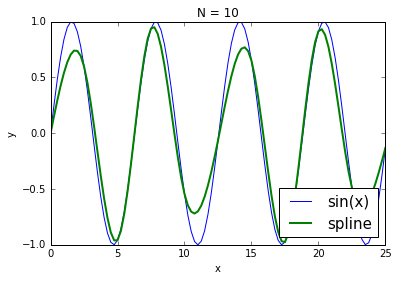

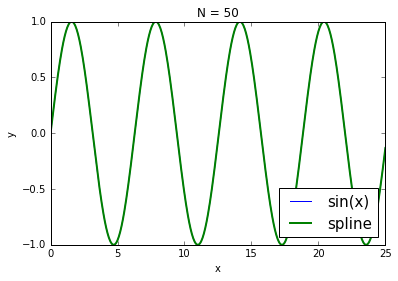

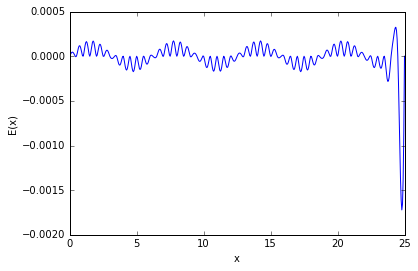

In [24]:
xlist = np.linspace(a, b, N*10+1)
y_spline_calc = [calc(x, y_spline_1) for x in xlist]
plt.plot(xlist, f_vect(function, xlist), label="sin(x)")
plt.plot(xlist, y_spline_calc, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 10')
plt.show()


xlist = np.linspace(a, b, N2*10+1)
y_spline_calc = [calc(x, y_spline_2) for x in xlist]
plt.plot(xlist, f_vect(function, xlist), label="sin(x)")
plt.plot(xlist, y_spline_calc, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 50')
plt.show()


x = np.linspace(a, b, len(y_spline_calc))
plt.plot(x, f_vect(function, x) - y_spline_calc)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.xlim(a, b)
plt.show()

Теперь посмотрим на случай разрывной функции:

In [25]:
function = '1/x**2'
a = -1
b = 1
N = 10
points = []

In [26]:
y_spline_1 = getInterpolation(a, b, N, function, points)

In [27]:
N2 = 200
points = []

In [28]:
y_spline_2 = getInterpolation(a, b, N2, function, points)

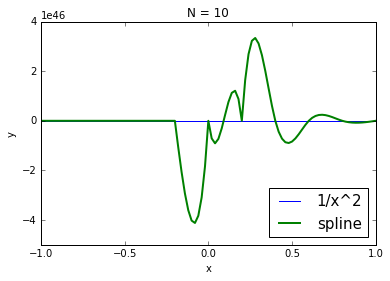

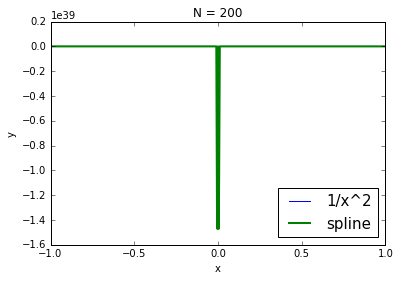

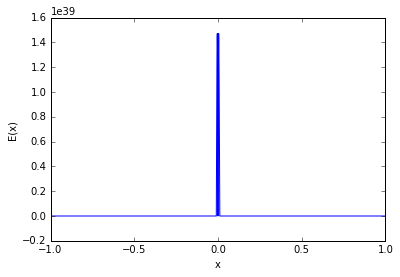

In [29]:
xlist = np.linspace(a, b, N*10+1)
y_spline_calc = [calc(x, y_spline_1) for x in xlist]
plt.plot(xlist, f_vect(function, xlist), label="1/x^2")
plt.plot(xlist, y_spline_calc, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 10')
plt.show()


xlist = np.linspace(a, b, N2*10+1)

y_spline_calc = [calc(x, y_spline_2) for x in xlist]
plt.plot(xlist, f_vect(function, xlist), label="1/x^2")
plt.plot(xlist, y_spline_calc, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 200')
plt.show()


x = np.linspace(a, b, len(y_spline_calc))
plt.plot(x, f_vect(function, x) - y_spline_calc)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.xlim(a, b)
plt.show()

И на случай осциллирующей функции:

In [54]:
function = 'x*math.cos(6*x)'
a = 1
b = 25
N = 20
points = []

In [55]:
y_spline_1 = getInterpolation(a, b, N, function, points)

In [56]:
N2 = 200
points = []

In [57]:
y_spline_2 = getInterpolation(a, b, N2, function, points)

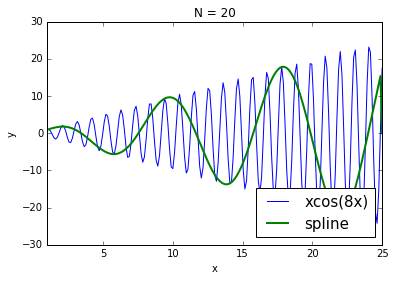

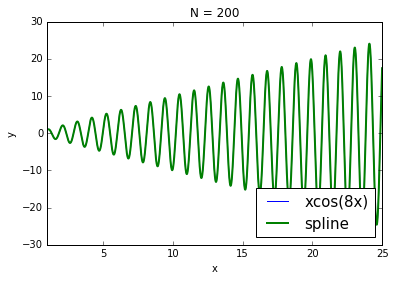

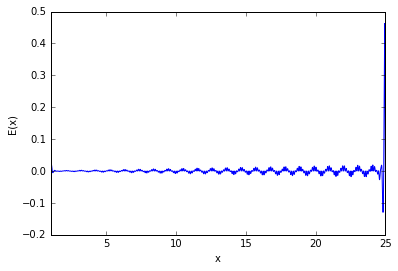

In [58]:
xlist = np.linspace(a, b, N*10+1)
y_spline_calc = [calc(x, y_spline_1) for x in xlist]
plt.plot(xlist, f_vect(function, xlist), label="xcos(8x)")
plt.plot(xlist, y_spline_calc, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 20')
plt.show()


xlist = np.linspace(a, b, N2*10+1)
y_spline_calc = [calc(x, y_spline_2) for x in xlist]
plt.plot(xlist, f_vect(function, xlist), label="xcos(8x)")
plt.plot(xlist, y_spline_calc, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 200')
plt.show()


x = np.linspace(a, b, len(y_spline_calc))
plt.plot(x, f_vect(function, x) - y_spline_calc)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.xlim(a, b)
plt.show()